### Homework 8 PART TWO

RSA and MDS using MNIST

In [1]:
import numpy as np
import numpy.random as R
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.manifold import MDS

import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=FutureWarning)
    from tensorflow.keras.datasets import fashion_mnist
    from tensorflow.keras import models
    from tensorflow.keras import layers
    from tensorflow.keras import optimizers
    from tensorflow.keras.utils import to_categorical
    from tensorflow.keras.models import Model

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

flabels = {0 : 't-shirt',
           1 : 'trousers',
           2 : 'pullover',
           3 : 'dress',
           4 : 'coat',
           5 : 'sandal',
           6 : 'shirt',
           7 : 'sneaker',
           8 : 'bag',
           9 : 'boot'}

In [2]:
# image shape
sz = train_images.shape[1]

# need to reshape and preprocess the training/testing images
train_images_vec = train_images.reshape((train_images.shape[0], train_images.shape[1] * train_images.shape[2]))
train_images_vec = train_images_vec.astype('float32') / 255
test_images_vec = test_images.reshape((test_images.shape[0], test_images.shape[1] * test_images.shape[2]))
test_images_vec = test_images_vec.astype('float32') / 255

# also need to categorically encode the labels
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

Q2a (1	point).	You	will create	RDMs	and	MDS	solutions	using	five	examples	of	each	of	the	
10	clothing	types	in	the	Fashion-MNIST	dataset	(feel	free	to	adapt	the	code	I	gave	you	for	
the	MNIST	dataset).

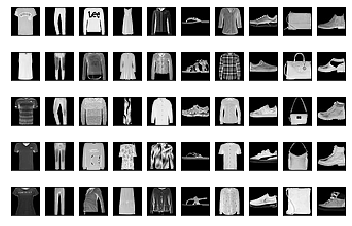

In [3]:
# get 5 examples of each clothing items

Nexamples = 5
Nclothes = train_labels_onehot.shape[1]
nout = Nclothes

example_images = np.zeros((Nclothes*Nexamples, sz, sz))
for i in range(Nclothes):
    idx = np.where(test_labels==i)[0]
    example_images[i*Nexamples:(i+1)*Nexamples, :, :] = test_images[idx[0:Nexamples], :, :]

idx = 0
fig = plt.figure()
for i in range(Nclothes):
    for j in range(Nexamples):
        plt.subplot(Nexamples,Nclothes,j*Nclothes+i+1)
        plt.imshow(example_images[idx], cmap='gray', interpolation='none')
        plt.xticks([])
        plt.yticks([])
        idx = idx+1
plt.show()

example_images_vec = example_images.reshape((example_images.shape[0], example_images.shape[1] * example_images.shape[2]))
example_images_vec = example_images_vec.astype('float32') / 255

Q2b (3 points).	Calculate	and	display	the	RDM	based	on	the	raw	pixel	values	of	the	images	
(the	resulting RDM	will	be	50x50) and	display	a	2D	MDS	solution	from	the	RDM.	I	gave	you	
much	of	the	code	to	get	started	on	this. Make	sure	the	RDM	and	MDS	are	labeled	with	the	
names	of	the	clothing	types.

In [4]:
def make_RDM(Nclothes, Nexamples, correlates, sz1, sz2, my_title):
    RDM = np.zeros((Nclothes*Nexamples, Nclothes*Nexamples))
    for i in range(Nclothes*Nexamples):
        for j in range(i, Nclothes*Nexamples):
            a = correlates[i,:,:]
            a = a.reshape((sz1*sz2))
            b = correlates[j,:,:]
            b = b.reshape((sz1*sz2))
            r, p = stats.kendalltau(a, b)
            RDM[i,j] = 1-r
            RDM[j,i] = 1-r

    # axis tick locations
    xtks = np.arange(np.int(Nexamples/2), Nclothes*Nexamples, Nexamples)
    ytks = xtks
    xlabs = []
    ylabs = []
    for i in range(len(xtks)):
        xlabs.append(str(i))
        ylabs.append(str(i))

    # plot RDM
    fig = plt.figure()
    im = plt.imshow(RDM, cmap='jet', interpolation='none')
    plt.title(my_title)
    plt.xticks(xtks, xlabs)
    plt.yticks(ytks, ylabs)
    plt.colorbar(im)
    plt.show()
    
    return RDM

In [5]:
def make_MDS(RDM, Nclothes, Nexamples, flabels, my_title):
    # perform 2D MDS
    mdsmodel = MDS(n_components=2, metric=True, 
                   dissimilarity='precomputed')
    mdssoln = mdsmodel.fit_transform(RDM)

    # labels and colors for digits
    dlabs = []
    clabs = []
    carr = ['brown', 'olive', 'navy', 'lawngreen', 'turquoise',
            'magenta', 'red', 'grey', 'orange', 'pink']
    for i in range(Nclothes):
        for j in range(Nexamples):
            dlabs.append(flabels[i])
            clabs.append(carr[i])

    plt.figure(figsize=(6,6))
    for i in range(Nclothes*Nexamples):
        plt.plot(mdssoln[i,0], mdssoln[i,1], 'w+')
        plt.text(mdssoln[i,0], mdssoln[i,1], 
                 r'$ {} $'.format(dlabs[i]), size='large',
                 color=clabs[i],
                 horizontalalignment='center')
    plt.title(my_title)
    plt.show()

C:\Users\kdmen\miniconda3\envs\NSCenv\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


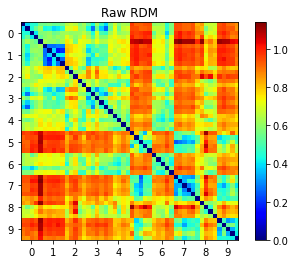

In [6]:
RDM_Raw = make_RDM(Nclothes, Nexamples, example_images, sz, sz, "Raw RDM")

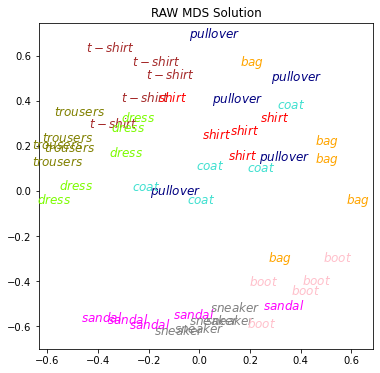

In [7]:
make_MDS(RDM_Raw, Nclothes, Nexamples, flabels, "RAW MDS Solution")

Q2c	(4 points).	Calculate	and	display	the	RDM	based	on	an	early	or	intermediate	layer of	
your	trained	CNN	model	from	Homework	7 (based	on	the	discussion	from	class	and	using	
the	approach	outlined	in	the	ipynb	file	provided) and	display	a	2D	MDS	solution	from	this	
RDM. Make	sure	the	RDM	and	MDS	are	labeled	with	the	names	of	the	clothing	types.

In [8]:
# Reshape the training images to be a flattened 2D representation
base_dim = train_images.shape[1]
new_dim = train_images.shape[1] * train_images.shape[2]
train_2D = np.reshape(train_images, (train_images.shape[0], new_dim))

# Expand the training labels to be 2D
train_labels_2D = np.reshape(train_labels, (train_labels.shape[0], 1))

# Shuffle all vector (THE SAME ORDER)
shuffled_idx = R.permutation(train_2D.shape[0])
train_shuffled = train_2D[shuffled_idx,:]
train_labels_shuffled = train_labels_2D[shuffled_idx,:]

train_half = train_shuffled[0:train_shuffled.shape[0]//2]
train_labels_half = train_labels_shuffled[0:train_shuffled.shape[0]//2]

train_imagesREMAKE_shuffled = np.reshape(train_shuffled, (train_shuffled.shape[0],base_dim,base_dim))

input_sz = base_dim

# Reformat images to be "4D"
train_imagesRE1 = train_images.reshape(train_images.shape[0], input_sz, input_sz, 1)
test_imagesRE1 = test_images.reshape(test_images.shape[0], input_sz, input_sz, 1)

# Normalize
train_imagesRE = train_imagesRE1/255
test_imagesRE = test_imagesRE1/255

# need to categorically encode the labels as "one hot"
train_labelsRE = to_categorical(train_labels)
test_labelsRE = to_categorical(test_labels)

In [9]:
network = models.Sequential()
# first convolution layer parameters
num_fm_1 = 16
conv_dim = 3
# second convolution layer parameters
num_fm_2 = 24
# max pooling parameters
mp_dim = 2
nout = 10
# Dense params
dense1 = 40
dense2 = 20

# first convolution layer
network.add(layers.Conv2D(num_fm_1, (conv_dim, conv_dim), 
                          activation='relu', 
                          input_shape=(input_sz, input_sz, 1)))
# max pooling
network.add(layers.MaxPooling2D(mp_dim, mp_dim))

# second convolution layer
network.add(layers.Conv2D(num_fm_1*4, (conv_dim, conv_dim), padding='same'))
# max pooling
network.add(layers.MaxPooling2D(mp_dim, mp_dim))

network.add(layers.Conv2D(num_fm_2*2, (conv_dim,conv_dim), padding='same', activation='relu'))
# max pooling
network.add(layers.MaxPooling2D(mp_dim, mp_dim))

network.add(layers.Conv2D(num_fm_2, (conv_dim,conv_dim), padding='same', activation='relu'))
network.add(layers.Conv2D(num_fm_1, (conv_dim,conv_dim), padding='same', activation='relu'))

network.add(layers.Flatten())
network.add(layers.Dense(dense1, activation='relu'))
network.add(layers.Dense(dense2, activation='relu'))
network.add(layers.Dense(nout, activation='softmax'))

network.compile(optimizer='adam', loss='categorical_crossentropy',
                metrics=['accuracy'])
network.summary()

history = network.fit(train_imagesRE, train_labelsRE, verbose=False,
                      validation_split=.2, epochs=20, batch_size=256)

test_loss, test_accuracy = network.evaluate(test_imagesRE, test_labelsRE)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 48)          27696     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 48)          0         
____

In [10]:
print('test_acc:', test_accuracy)

test_acc: 0.9062


In [11]:
for layer in network.layers:
    print(f'layer name : {layer.name} | input shape : {layer.input.shape} | output shape : {layer.output.shape}')
print()

layer name : conv2d | input shape : (?, 28, 28, 1) | output shape : (?, 26, 26, 16)
layer name : max_pooling2d | input shape : (?, 26, 26, 16) | output shape : (?, 13, 13, 16)
layer name : conv2d_1 | input shape : (?, 13, 13, 16) | output shape : (?, 13, 13, 64)
layer name : max_pooling2d_1 | input shape : (?, 13, 13, 64) | output shape : (?, 6, 6, 64)
layer name : conv2d_2 | input shape : (?, 6, 6, 64) | output shape : (?, 6, 6, 48)
layer name : max_pooling2d_2 | input shape : (?, 6, 6, 48) | output shape : (?, 3, 3, 48)
layer name : conv2d_3 | input shape : (?, 3, 3, 48) | output shape : (?, 3, 3, 24)
layer name : conv2d_4 | input shape : (?, 3, 3, 24) | output shape : (?, 3, 3, 16)
layer name : flatten | input shape : (?, 3, 3, 16) | output shape : (?, 144)
layer name : dense | input shape : (?, 144) | output shape : (?, 40)
layer name : dense_1 | input shape : (?, 40) | output shape : (?, 20)
layer name : dense_2 | input shape : (?, 20) | output shape : (?, 10)



In [12]:
RE_ex_image = np.reshape(example_images, (50, 28, 28, 1))

layer_name = 'conv2d_3'
intermediate_layer_model = Model(inputs = network.input,  
            outputs = network.get_layer(layer_name).output)
intermediate_output =  intermediate_layer_model.predict(RE_ex_image)
print(intermediate_output.shape)

(50, 3, 3, 24)


C:\Users\kdmen\miniconda3\envs\NSCenv\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


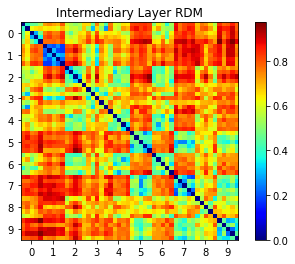

In [13]:
ioIO = np.reshape(intermediate_output, (50, 9, 24))

Inter_RDM = make_RDM(Nclothes, Nexamples, ioIO, ioIO.shape[1], ioIO.shape[2], "Intermediary Layer RDM")

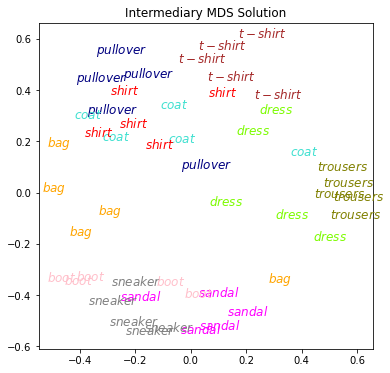

In [14]:
make_MDS(Inter_RDM, Nclothes, Nexamples, flabels, "Intermediary MDS Solution")

Q2d (2	points).	Do	the	same	as	Q2c	but	for	the	penultimate	layer (the	layer	before	the	
classification	layer) of	your	CNN	model	from	Homework 7.

In [15]:
ex1, ex2, ex3 = example_images.shape[0], example_images.shape[1], example_images.shape[2]
RE_ex_image = np.reshape(example_images, (ex1, ex2, ex3, 1))

layer_name = 'dense_1'
penultimate_layer_model = Model(inputs = network.input,  
            outputs = network.get_layer(layer_name).output)
penultimate_output =  penultimate_layer_model.predict(RE_ex_image)
print(penultimate_output.shape)

(50, 20)


C:\Users\kdmen\miniconda3\envs\NSCenv\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


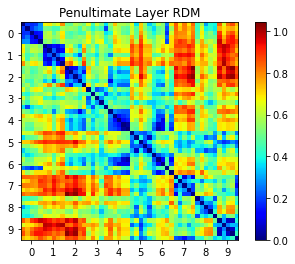

In [16]:
pnu1, pnu2 = penultimate_output.shape[0], penultimate_output.shape[1]
pnu = np.reshape(penultimate_output, (pnu1, pnu2, 1))

Penultimate_RDM = make_RDM(Nclothes, Nexamples, pnu, pnu.shape[1], pnu.shape[2], "Penultimate Layer RDM")

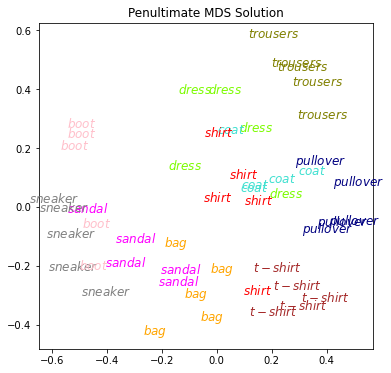

In [17]:
make_MDS(Penultimate_RDM, Nclothes, Nexamples, flabels, "Penultimate MDS Solution")